In [1]:
import os, io, sys
sys.path.append(r"C:\Users\91974\Documents\Python Venv\vision_demo\Lib\site-packages")
from google.cloud import vision
from google.cloud.vision import types 
import pandas as pd
import numpy as np
from PIL import Image

#set up client instance
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"vision_api_sa_token.json"

client = vision.ImageAnnotatorClient()

In [4]:
def implot(img):
    plt.figure(figsize=(20,20))
    imgplot = plt.imshow(img, cmap = "gray")
    plt.show()

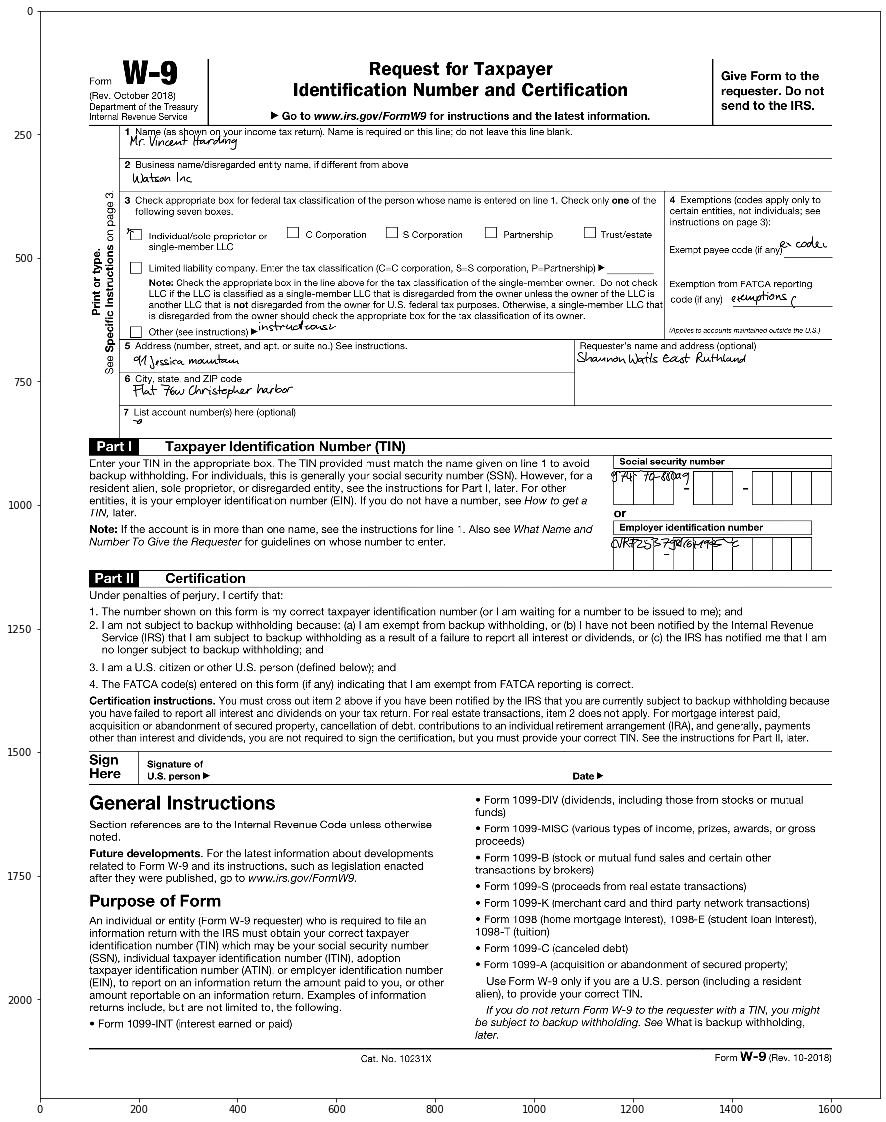

In [5]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('0.png')
img2 = cv2.imread('1.png')
img3 = cv2.imread('temp_out_0.png')
img4 = cv2.imread('temp_out_1.png')

implot(img1)

In [3]:

folder_path = r'C:\Users\91974\Documents\Python Venv\vision_demo\Images'
image_path = '0.png'
file_path = os.path.join(folder_path, image_path)

with io.open(file_path, 'rb') as image_file:
    content = image_file.read()

# construct an image instance
image = vision.types.Image(content=content)
response = client.document_text_detection(image = image)
docText = response.full_text_annotation.text
print(docText)

W-9
Request for Taxpayer
Identification Number and Certification
Give Form to the
requester. Do not
send to the IRS.
Form
(Rev. October 2018)
Department of the Treasury
Internal Revenue Service
Go to www.irs.gov/FormW9 for instructions and the latest information.
1 Name (as shown on your income tax return). Name is required on this line; do not leave this line blank.
"Mr. Vincent Harding
2 Business name/disregarded entity name, if different from above
Watson Inc
3 Check appropriate box for federal tax classification of the person whose name is entered on line 1. Check only one of the
following seven boxes.
4 Exemptions (codes apply only to
certain entities, not individuals; see
instructions on page 3):
Individual/sole proprietor or
single-member LLC
O
c
Corporation
Is Corporation
Partnership
Trust/estate
Exempt payee code (if anyen codec
Print or type.
See Specific Instructions on page 3.
Limited liability company. Enter the tax classification (C=C corporation, S=S corporation, P=Partn

In [106]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:

        content = image_file.read()
        image = vision.types.Image(content=content)
        response = client.document_text_detection(image = image)
        docText =  response.full_text_annotation.text
        docText = docText.replace("\n", "")
    return (docText)

def get_handwritten_forms(form_path):
    import os, io, sys
    sys.path.append(r"C:\Users\91974\Documents\Python Venv\vision_demo\Lib\site-packages")
    from google.cloud import vision
    from google.cloud.vision import types 
    import pandas as pd
    import numpy as np
    from PIL import Image
    import glob
    import cv2
    from matplotlib import pyplot as plt

    #set up client instance
    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r"vision_api_sa_token.json"
    df_final = pd.DataFrame( columns=['Name','BusinessName','Instructions','Address','City',
                                    'SocialSeciurityNumber','EmpIdentificationNumber'])
    j=1
    for form in form_path:
        img = cv2.imread(form)
        name = img[254:290,165:800]
        bname = img[330:370,165:800]
        inst = img[630:660,420:1100]
        # pcode = img1[255:290,100:425]
        # exmp = img1[255:290,100:425]
        ssn = img[930:1000,1150:1600]
        empid = img[1062:1110,1150:1600]
        add1 = img[700:730,165:1100]
        add2 = img[755:800,165:1100]
        
        cv2.imwrite("cropped_img/name.png", name)
        cv2.imwrite("cropped_img/bname.png", bname)
        cv2.imwrite("cropped_img/inst.png", inst)
        cv2.imwrite("cropped_img/ssn.png", ssn)
        cv2.imwrite("cropped_img/empid.png", empid)
        cv2.imwrite("cropped_img/add1.png", add1)
        cv2.imwrite("cropped_img/add2.png", add2)
        
        folder_path = r'./cropped_img'
        image_path = 'name.png'
        file_path = os.path.join(folder_path, image_path)
        name = detect_text(file_path)
        
        image_path = 'bname.png'
        file_path = os.path.join(folder_path, image_path)

        bname = detect_text(file_path)
        
        image_path = 'ssn.png'
        file_path = os.path.join(folder_path, image_path)

        ssn = detect_text(file_path)
        
        image_path = 'empid.png'
        file_path = os.path.join(folder_path, image_path)

        empid = detect_text(file_path)
        
        image_path = 'inst.png'
        file_path = os.path.join(folder_path, image_path)

        inst = detect_text(file_path)
        image_path = 'add1.png'
        file_path = os.path.join(folder_path, image_path)

        add1 = detect_text(file_path)
        image_path = 'add2.png'
        file_path = os.path.join(folder_path, image_path)

        add2 = detect_text(file_path)
        df = pd.DataFrame( columns=['Name','BusinessName','Instructions','Address','City',
                                             'SocialSeciurityNumber','EmpIdentificationNumber'])

        df.loc[j, ('Name')] = name
        df.loc[j, ('BusinessName')] = bname
        df.loc[j, ('Instructions')] = inst
        df.loc[j, ('Address')] = add1
        df.loc[j, ('City')] = add2
        df.loc[j, ('SocialSeciurityNumber')] = ssn
        df.loc[j, ('EmpIdentificationNumber')] = empid
        
        j = j+1
        df_final = df_final.append(df, ignore_index = True)
        
        
    return(df_final)
        
        

        
        
        
        
        
    

    

In [107]:
import glob
path = glob.glob("./forms/*.png")

df = get_handwritten_forms(path)
df


,Name,BusinessName,Instructions,Address,City,SocialSeciurityNumber,EmpIdentificationNumber
0,Mr. Vincent Harding,Watson Inc,instructions,di lessica mountam,Flat F6w Christopher harbor,9747 70-88009,CURAZSB73264190454
1,Gleun Roberts-Sinclair,Wilson Inc,instructions,7 Michelle skyway,on Sharon isle,L26-,||||||||||| | | | 64-4ESS) 0S672
2,Jodie Hammond-Harris,Harvey me,instructions,Studio 8 Atkins key,Flat 4 Lowe course,37,ROP16206272826[Boka
3,Richard James,Newman-Marshall,instructions,s Sam vista,Flat st Ruth rapids,4ZB 业一SH,sangpazzolyogle secoupT
